Importações

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score, roc_curve, auc
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\souza\\Downloads\\churnML\\data\\Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Estatistica descritiva 

In [3]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
# dropando id do dataset
df_out_id = df.copy()
df_out_id = df_out_id.drop('customer_id', axis=1)

In [8]:
df_out_id['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df_out_id['active_member'].value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

In [11]:
df_out_id['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Analise multivariada

In [12]:
# separaçao de tipagem 
num_col = df_out_id.select_dtypes(exclude='object')
cat_col = df_out_id.select_dtypes(exclude='number').columns

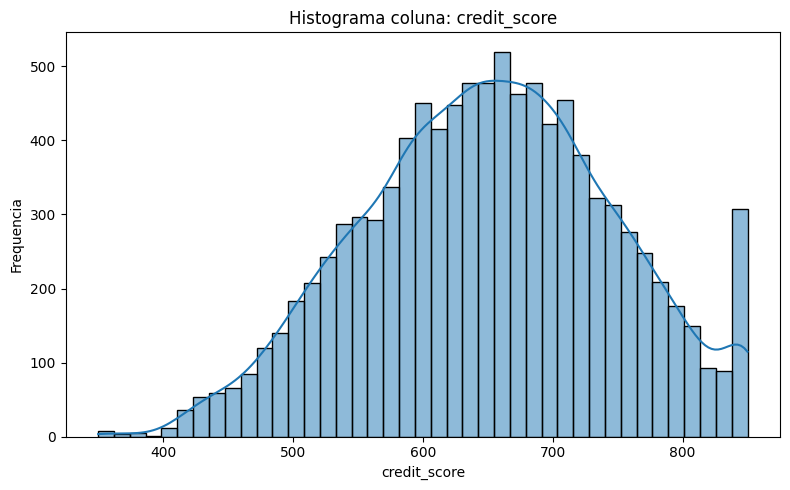

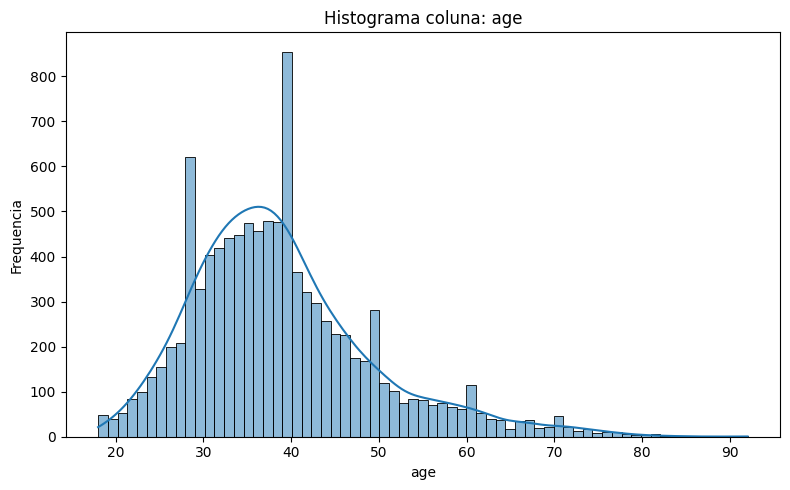

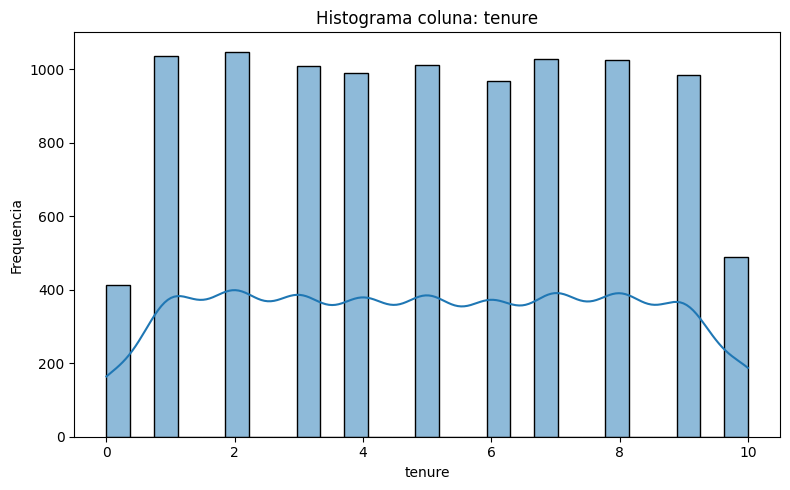

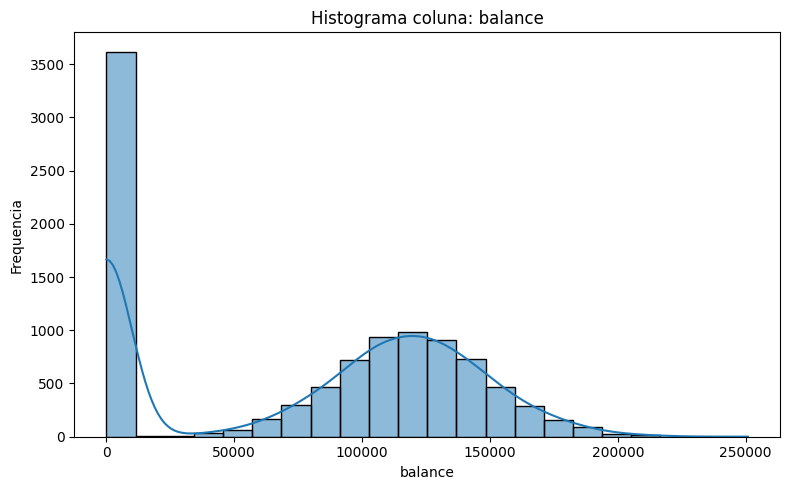

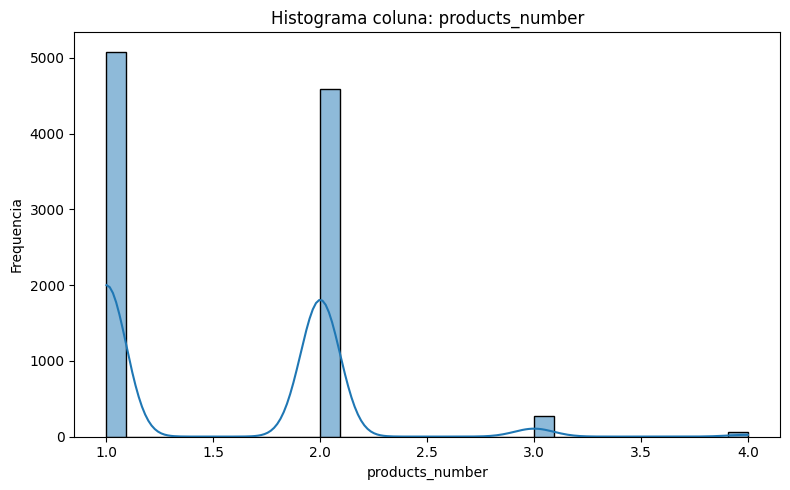

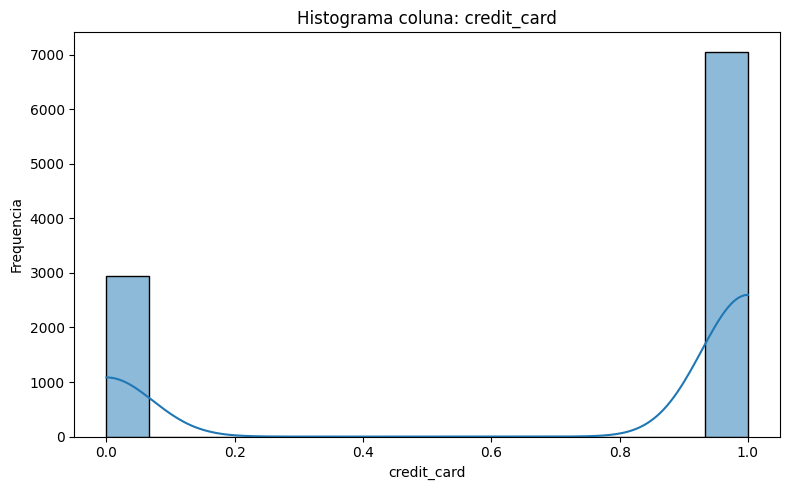

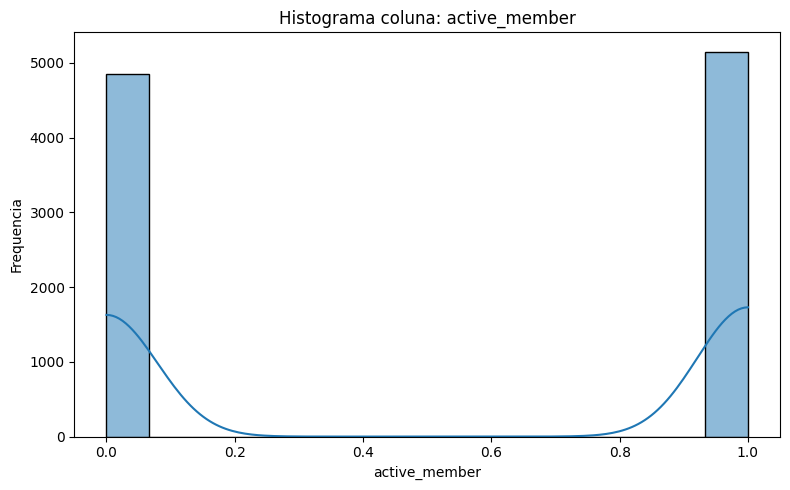

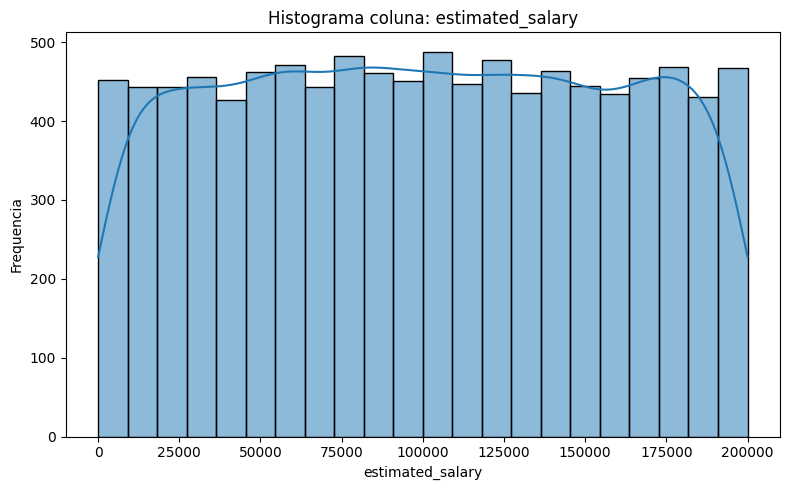

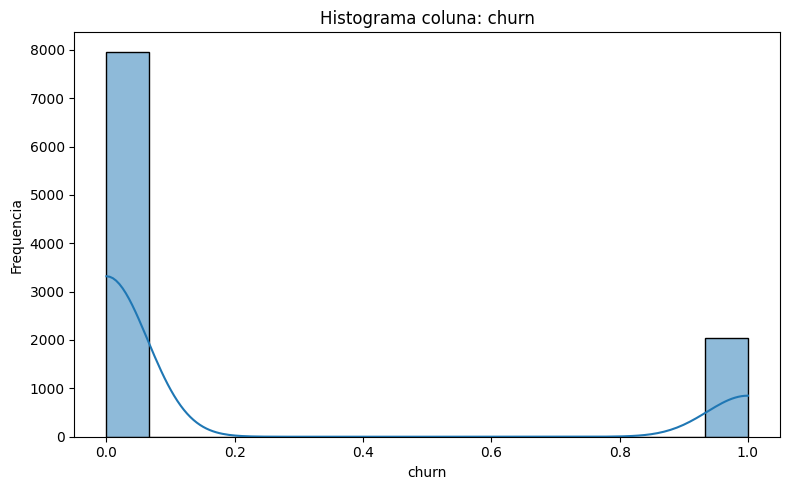

In [13]:
# plotando variaveis numericas 
for i, num in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'Histograma coluna: {num}')
    sns.histplot(df_out_id[num], kde=True)
    plt.ylabel('Frequencia')
    plt.tight_layout()
    plt.show()

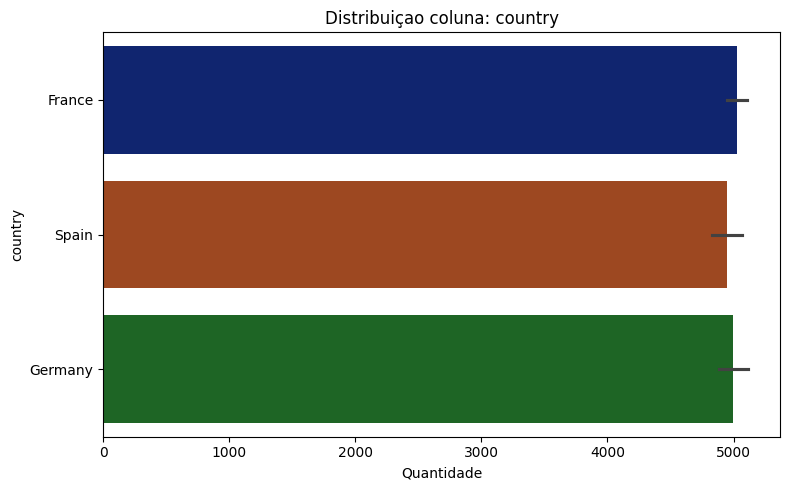

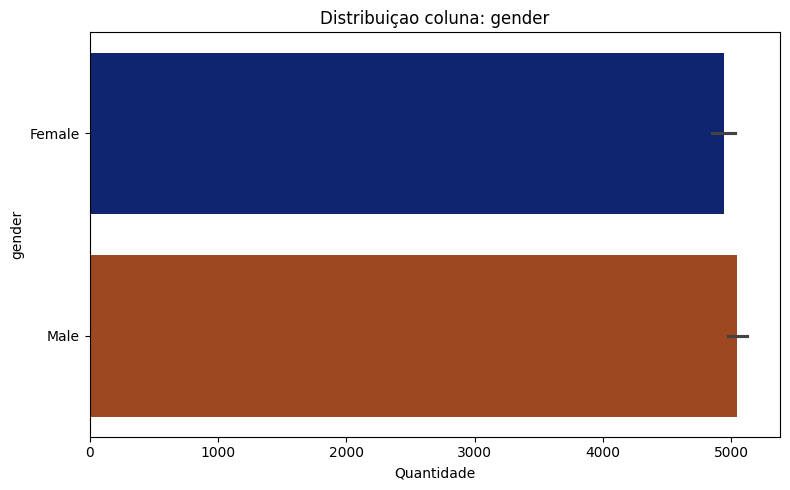

In [14]:
# plotando variaveis categoricas 
for i, cat in enumerate(cat_col):
    plt.figure(figsize=(8,5))
    plt.title(f'Distribuiçao coluna: {cat}')
    sns.barplot(df_out_id[cat], palette='dark')
    plt.xlabel('Quantidade')
    plt.tight_layout()
    plt.show()
    

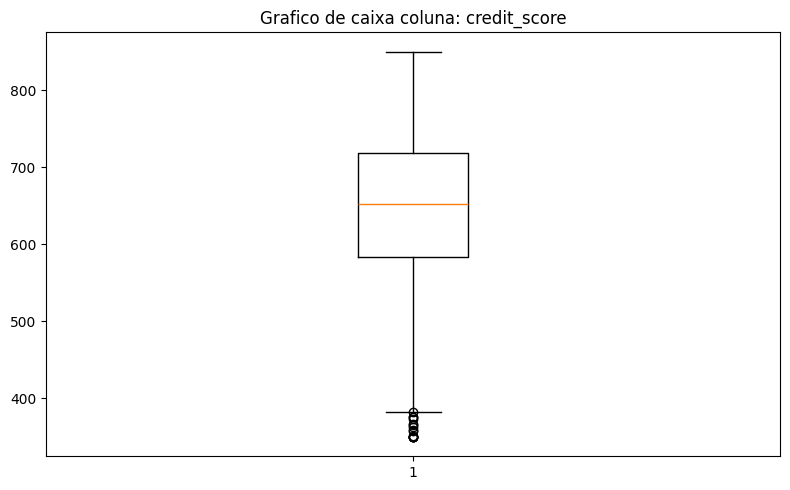

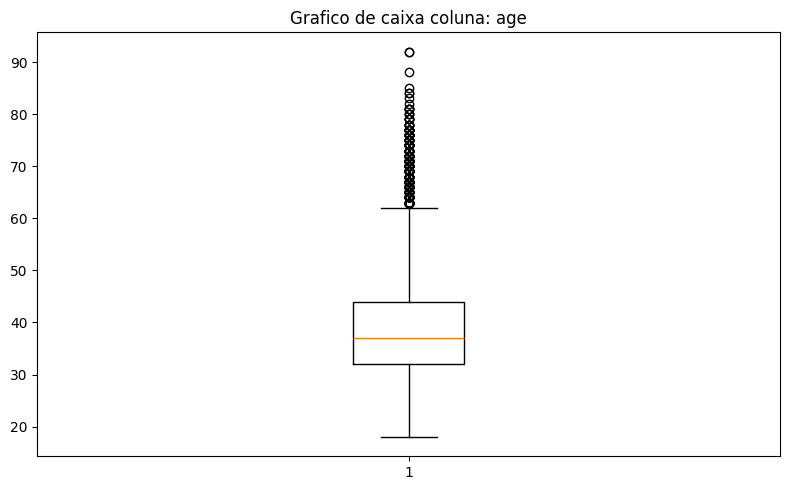

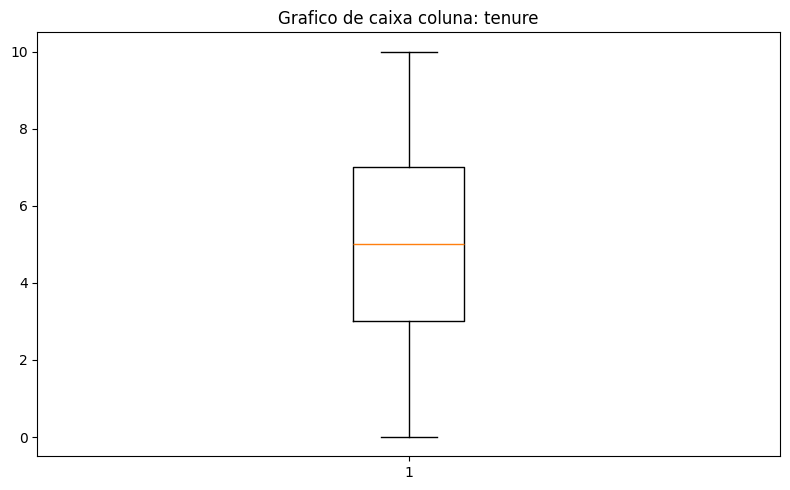

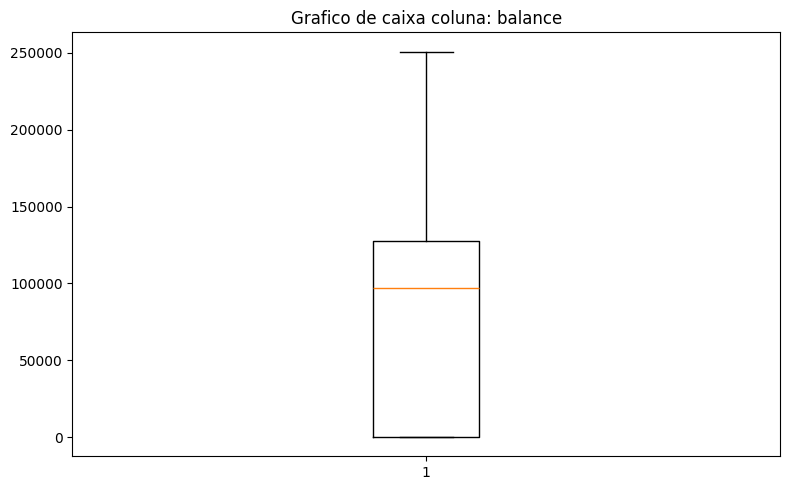

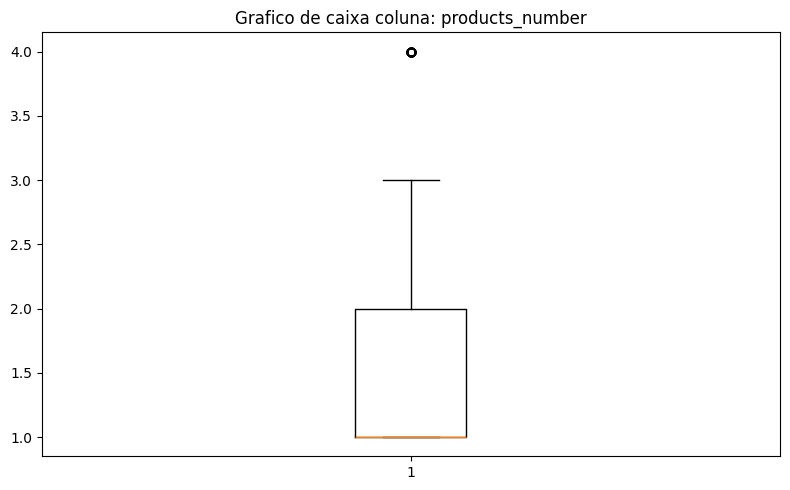

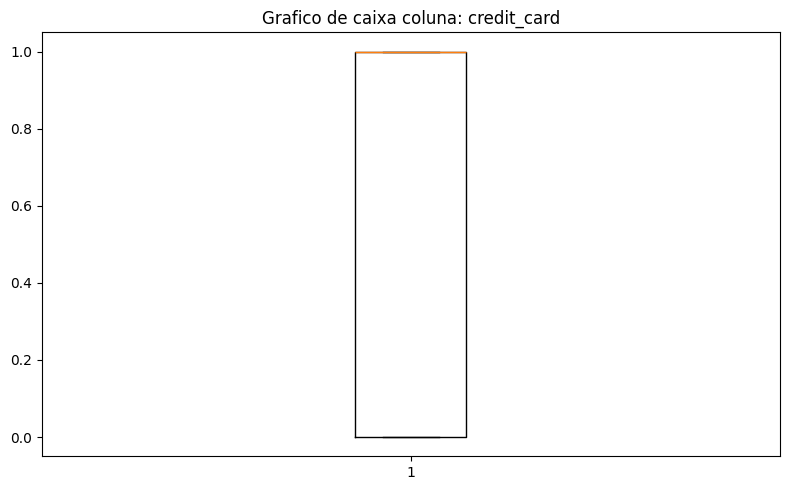

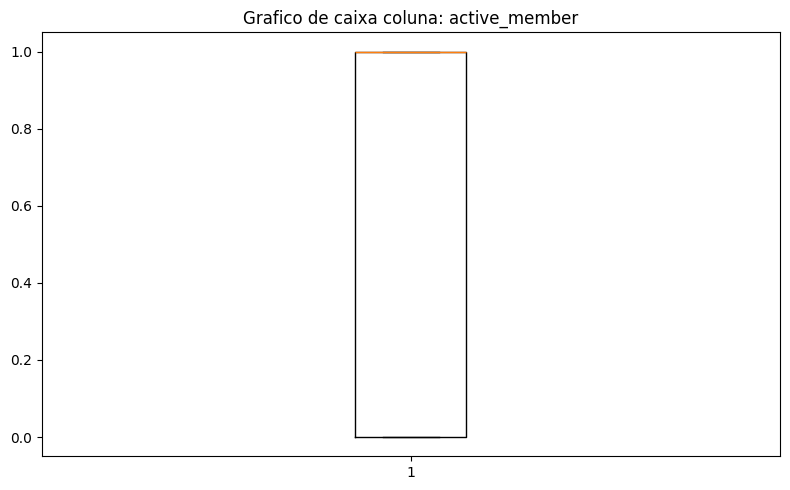

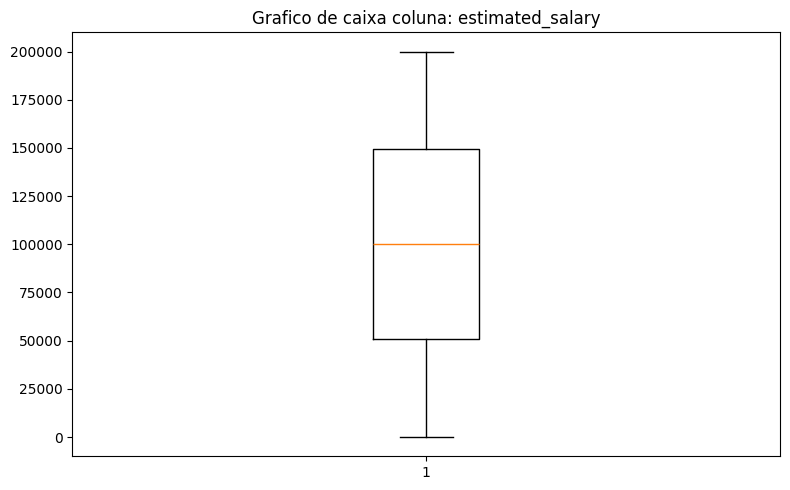

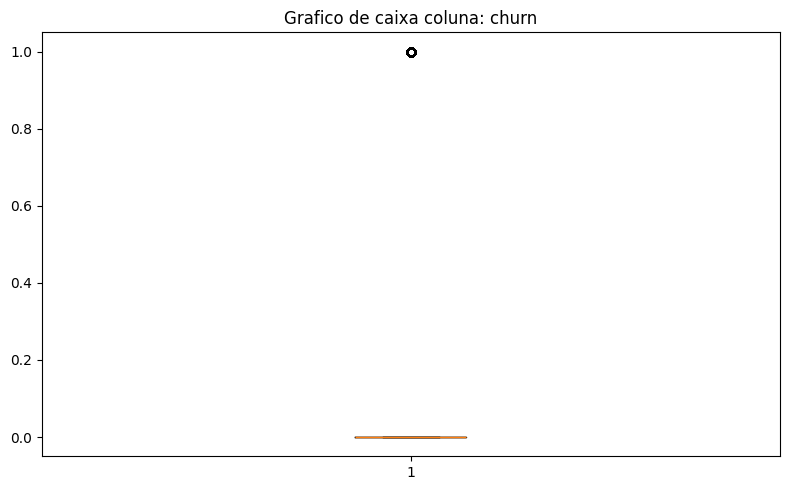

In [15]:
for i, box in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'Grafico de caixa coluna: {box}')
    plt.boxplot(df_out_id[box])
    plt.tight_layout()
    plt.show()

Analise bivariada 

In [16]:
# selecionando algumas variaveis num'ricas para analisar junto com o churn 
some_features = [
    'active_member',
    'credit_card',
    'tenure',
]

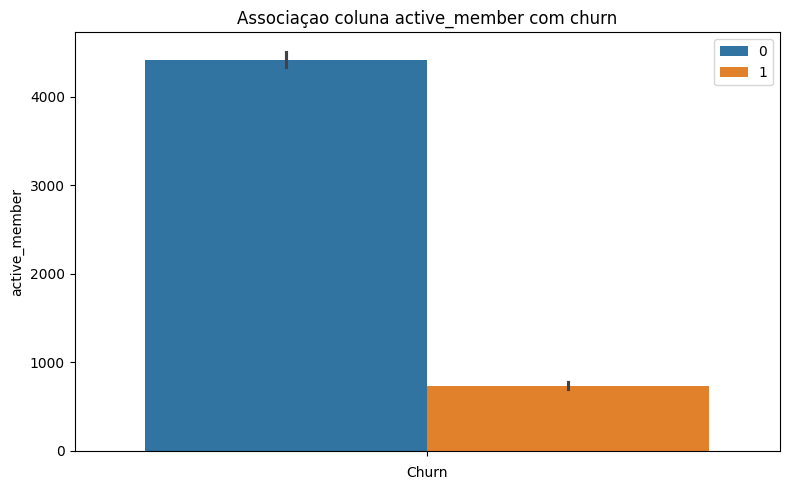

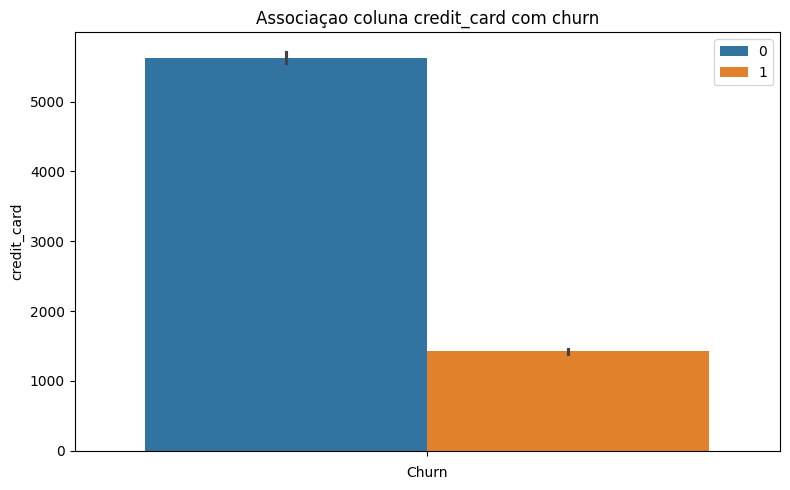

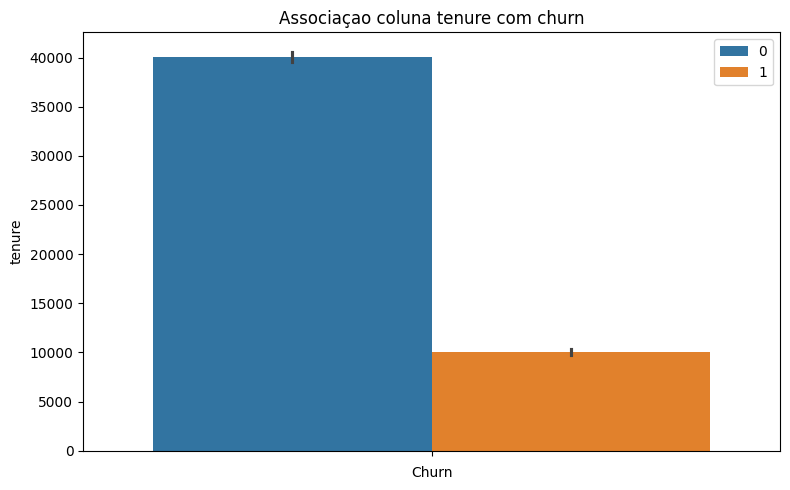

In [17]:
# plotando variaveis
for i, some_feat in enumerate(some_features):
    plt.figure(figsize=(8,5))
    plt.title(f'Associaçao coluna {some_feat} com churn')
    sns.barplot(data=df_out_id, y=some_feat, hue='churn', estimator='sum')
    plt.xlabel('Churn')
    plt.tight_layout()
    plt.legend()
    plt.show()

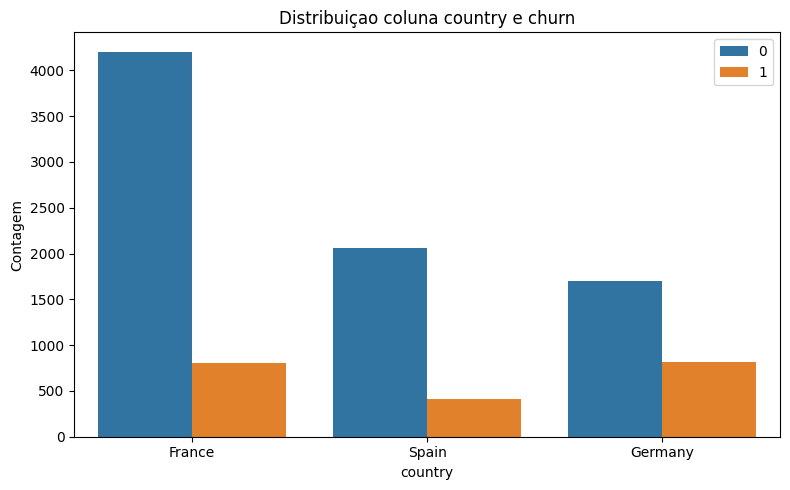

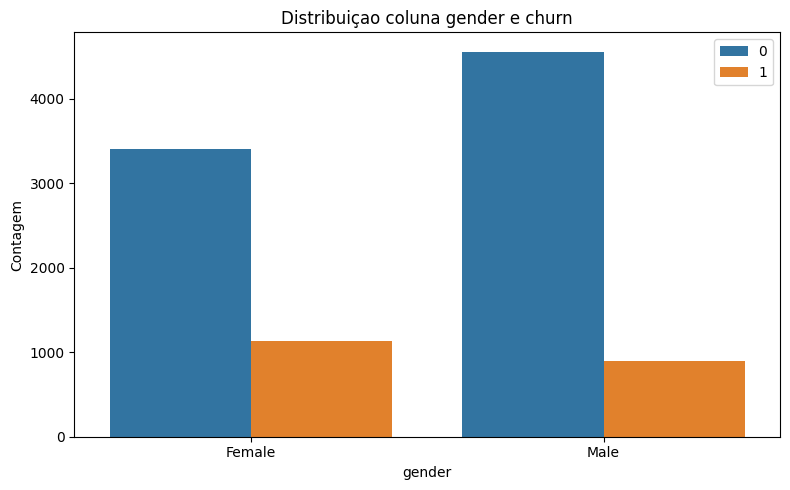

In [18]:
# plotando variaveis categoricas com churn
for i, cat_churn in enumerate(cat_col):
    plt.figure(figsize=(8,5))
    plt.title(f'Distribuiçao coluna {cat_churn} e churn')
    sns.countplot(data=df_out_id, x=cat_churn, hue='churn')
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.legend()
    plt.show()

Analise multivariada 

In [19]:
df_out_id.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

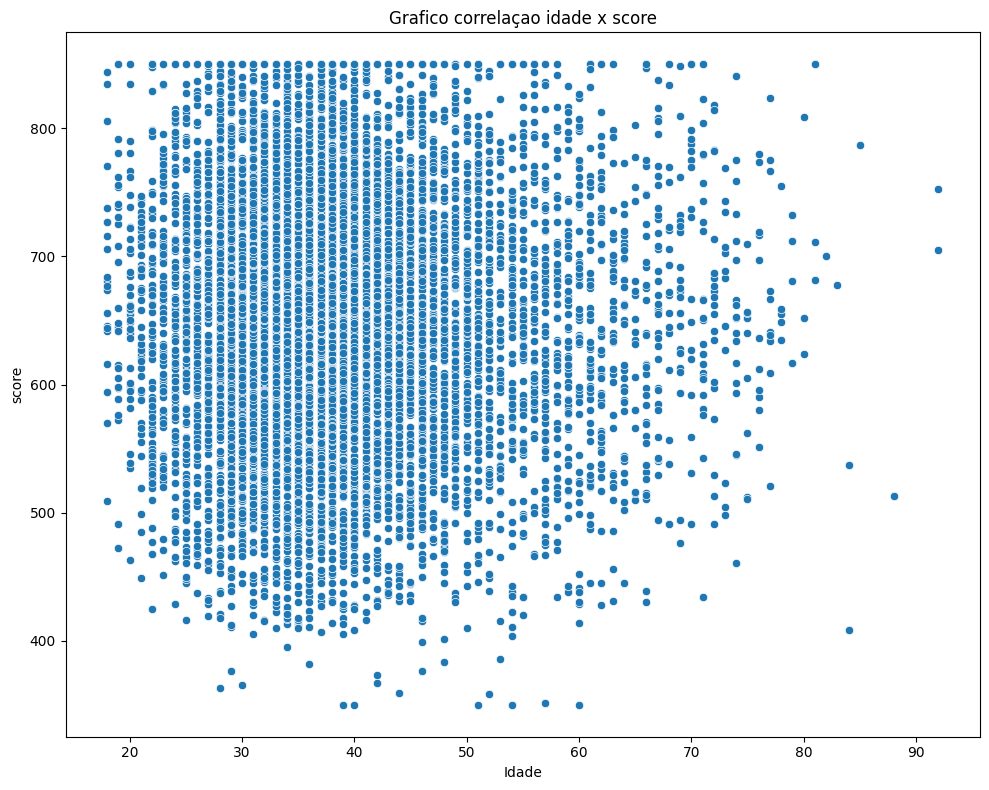

In [20]:
plt.figure(figsize=(10,8))
plt.title('Grafico correlaçao idade x score')
sns.scatterplot(data=df_out_id, x='age', y='credit_score')
plt.xlabel('Idade')
plt.ylabel('score')
plt.tight_layout()
plt.show()

Não há correlaçao entre a idade do cliente e a seu score. Confirmando assim, que um jovem de 18 anos pode ter 1000 de score e um senhor de 80 ter 500

**clientes com maior score tendem a permanecer no banco?**

In [21]:
df_out_id['level_score'] = pd.cut(df_out_id['credit_score'],
                                bins=[200,500,650, 700,900],
                                labels=['baixo', 'medio', 'bom', 'excelente'])
score_cut = df_out_id.groupby('level_score')['churn'].mean().reset_index()

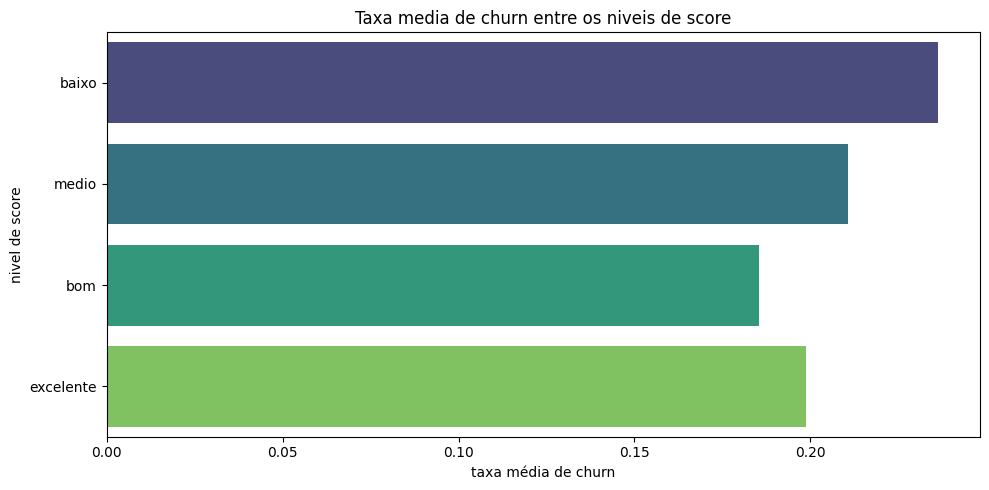

In [22]:
plt.figure(figsize=(10,5))
plt.title('Taxa media de churn entre os niveis de score')
sns.barplot(data=score_cut, y='level_score', x='churn', palette='viridis')
plt.xlabel('taxa média de churn')
plt.ylabel('nivel de score')
plt.tight_layout()
plt.show()



Como calculamos, clientes com score classificado como baixo representam maior indice de churn 

**cliente mais jovens tendem a permanecer no banco?**

In [23]:
churn_age = df_out_id.groupby('age')['churn'].mean().reset_index()

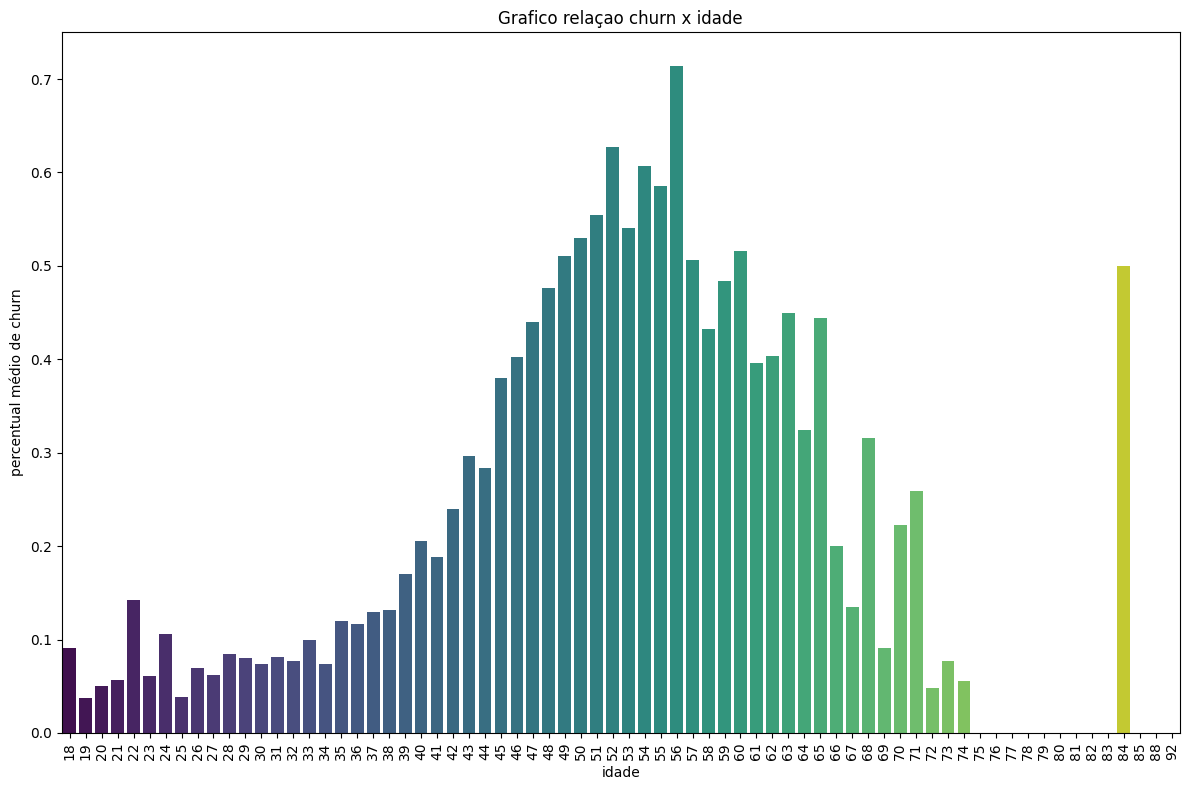

In [24]:
plt.figure(figsize=(12,8))
plt.title('Grafico relaçao churn x idade')
sns.barplot(data=churn_age, x='age', y='churn', palette='viridis')
plt.xlabel('idade')
plt.ylabel('percentual médio de churn')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Não. Os jovens de idade entre 18-30 anos representam maioria entre as menores médias de churn. O grupo que representa maior parte dos churns são os adultos de meia idade. 

**qual o sexo que contem maior score entre os clientes? ele é mais propenso a churn?**

In [25]:
# calculando média de churn por sexo 
sex_churn = df_out_id.groupby('gender')['churn'].mean().reset_index()


In [26]:
# calculando média de score por genero
score_sex = df_out_id.groupby('gender')['credit_score'].mean().reset_index()


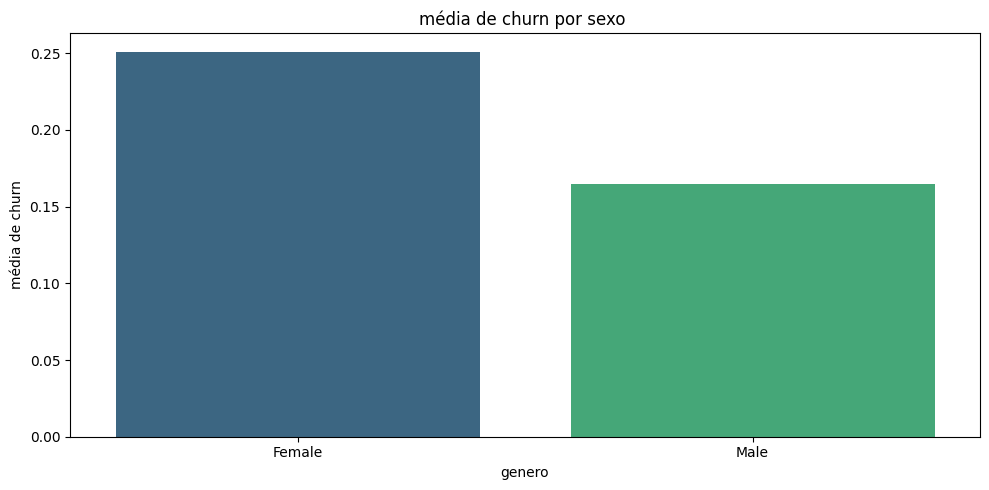

In [27]:
# plotando grafico média de churn por genero 
plt.figure(figsize=(10,5))
plt.title('média de churn por sexo ')
sns.barplot(data=sex_churn, x='gender', y='churn', palette='viridis')
plt.xlabel('genero')
plt.ylabel('média de churn')
plt.tight_layout()
plt.show()

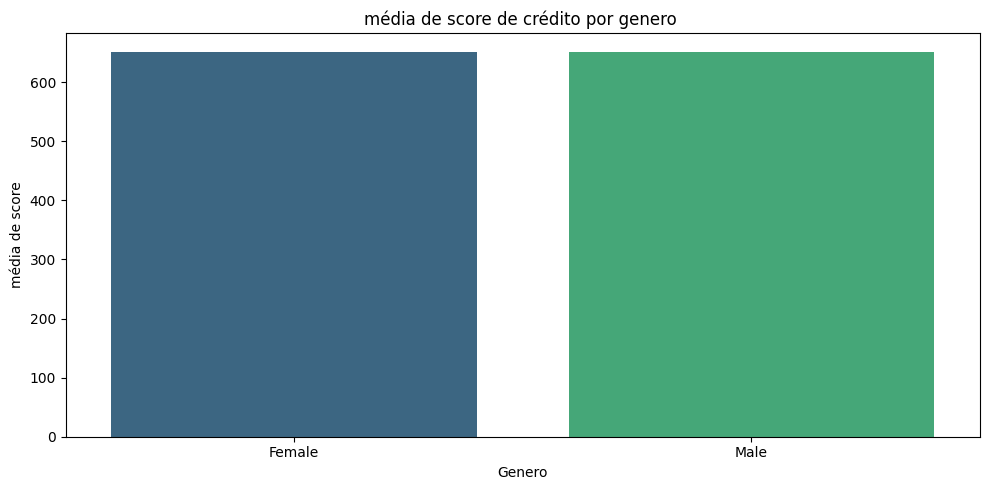

In [28]:
# plotando grafico média de crédito por genero 
plt.figure(figsize=(10,5))
plt.title('média de score de crédito por genero ')
sns.barplot(data=score_sex, x='gender', y='credit_score', palette='viridis')
plt.xlabel('Genero')
plt.ylabel('média de score')
plt.tight_layout()
plt.show()

Concluimos que não há distinçao de generos na nossa variavel credit_score. Porem, ao analisar a média de churn entre os generos, vemos que o sexo feminino é predominante em contratos cancelados. 

**tempo de casa pode ser um indicador contra o churn?**

In [29]:
tenure_churn = df_out_id.groupby('tenure')['churn'].mean().reset_index()

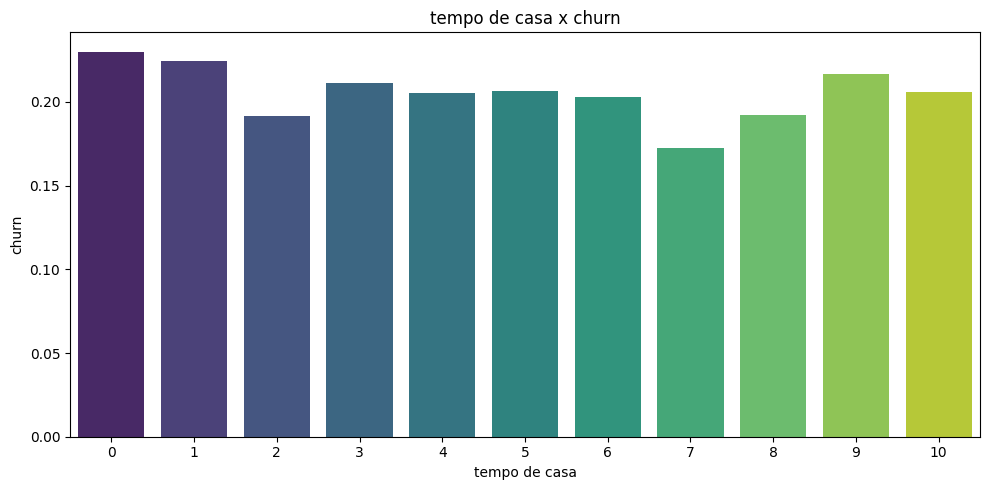

In [30]:
plt.figure(figsize=(10,5))
plt.title('tempo de casa x churn')
sns.barplot(data=tenure_churn, x='tenure', y='churn', palette='viridis')
plt.xlabel('tempo de casa')
plt.tight_layout()
plt.show()

O tempo de casa nao influencia o churn

**Existe diferença na média de credit_score entre clientes que saíram (churn) e os que ficaram?**

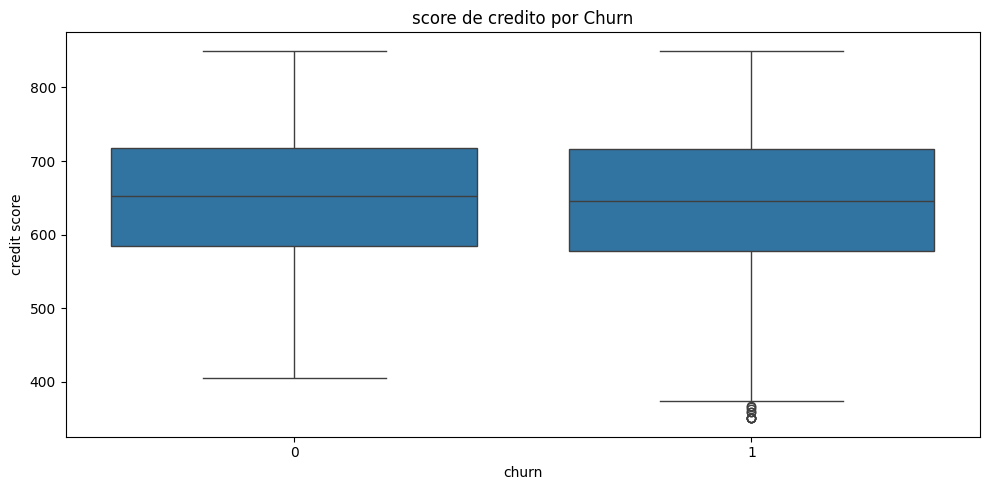

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='churn', y='credit_score')
plt.title('score de credito por Churn')
plt.xlabel('churn')
plt.ylabel('credit score')
plt.tight_layout()
plt.show()


Pelo grafico, vemos que clientes que possuem score abaixo de 400 sao propensos a churn

**o salario impacta no churn?**

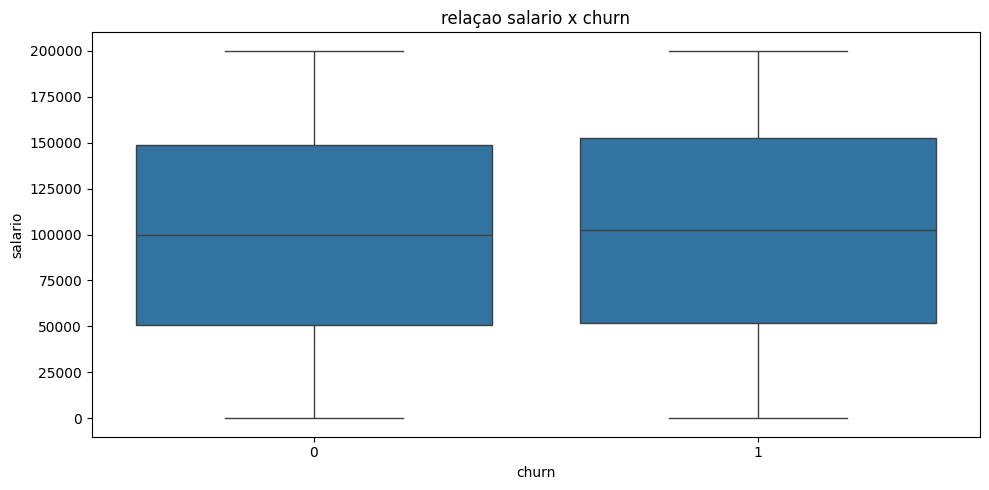

In [32]:
plt.figure(figsize=(10,5))
plt.title('relaçao salario x churn')
sns.boxplot(data=df_out_id, x='churn', y='estimated_salary')
plt.xlabel('churn')
plt.ylabel('salario')
plt.tight_layout()
plt.show()

O salario não impacta no churn

In [33]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**O numero de produtos contratados podem indicar churn?**

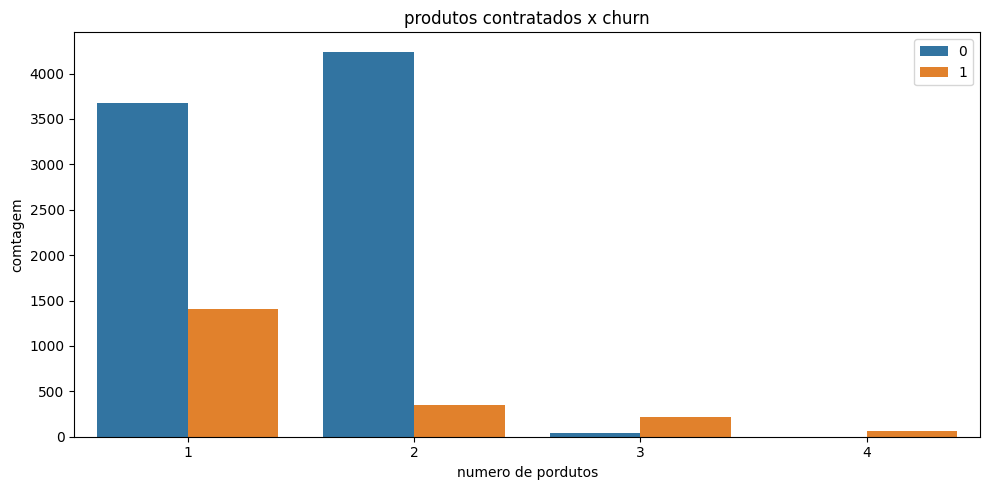

In [34]:
plt.figure(figsize=(10,5))
plt.title('produtos contratados x churn')
sns.countplot(data=df_out_id, x='products_number', hue='churn')
plt.xlabel('numero de pordutos')
plt.ylabel('comtagem')
plt.tight_layout()
plt.legend()
plt.show()

Na nossa base de dados, há uma maioria de contratantes de 1 a 2 produtos. Sendo predominante em churn aqueles que contrataram apenas 1 tipo de serviço. Porém, entre 3 a 4 produtos, há uma diferença gritante entre churn e aqueles que nao viraram evasao do produto. 

**Estatistica descritiva do churn**


In [35]:
df[df['churn'] == 1].describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


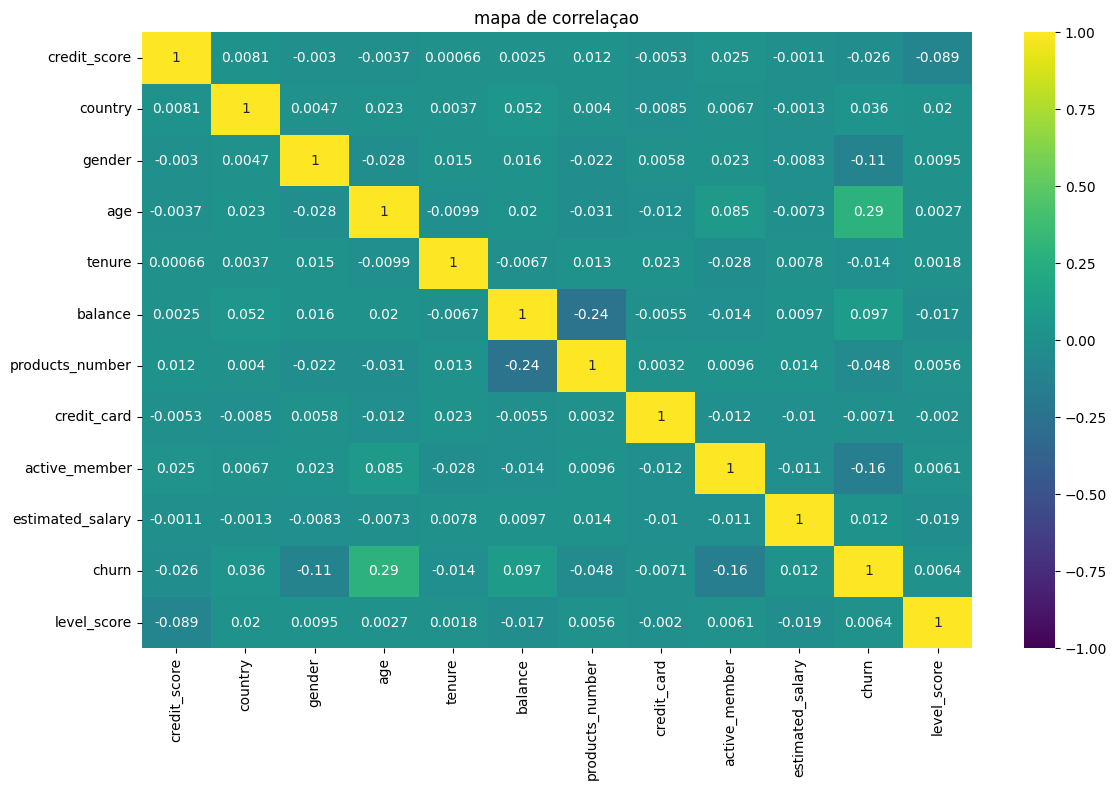

In [36]:
# plotando mapa de correlaçao
df_encoded = df_out_id.copy()
le = LabelEncoder()
for i, enco in enumerate(df_encoded):
    df_encoded[enco] = le.fit_transform(df_encoded[enco])
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
plt.title('mapa de correlaçao')
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

**Modelagem**

In [37]:
# vizualizaçao da classe (alvo)
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

Há desbalanceamento no nosso alvo

In [38]:
num_col.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [39]:
x = df_out_id.drop('churn', axis=1)
y = df_out_id['churn']

In [40]:
# split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [41]:
x_train.shape, y_train.shape

((8000, 11), (8000,))

In [42]:
x_test.shape, y_test.shape

((2000, 11), (2000,))

In [43]:
# selecionando atributos 
cat_atribs = ['country', 'gender']
num_atribs = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
    'credit_card', 'active_member', 'estimated_salary']

In [44]:
#column tranformer
columns_transf = ColumnTransformer([('scaler', MinMaxScaler(), num_atribs),
                                    ('one_hot', OneHotEncoder(handle_unknown='ignore'),cat_atribs)
                                                            ])

In [45]:
# criando pipeline 
pipe = Pipeline(steps=[('transf', columns_transf),
                    ('model', DecisionTreeClassifier(random_state=42))
                    ])

In [46]:
# testando a pipe
pipe.set_params(model=RandomForestClassifier()).fit(x_train, y_train)
pred = pipe.predict(x_test)
acc = accuracy_score(y_pred=pred, y_true=y_test)
print(f'acuracia: {acc}')

acuracia: 0.8575


In [47]:
# setando modelos 
models = {
    'arvore_de_decisao':DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'regressao_logistica': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(),
    'ada_boost': AdaBoostClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    #'ridge': RidgeClassifier(random_state=42),
    'lightGBM': LGBMClassifier(random_state=42),
    'rede_neural':MLPClassifier(random_state=42)
}

In [48]:
# funçao metrica 
def metrics(y_pred, y_true, pred_proba):
    metrics_ = {
        'acuracia':accuracy_score(y_pred=y_pred, y_true=y_true),
        'f1_score': f1_score(y_pred=y_pred, y_true=y_true),
        'recall': recall_score(y_true=y_true,  y_pred=y_pred),
        'roc_auc': roc_auc_score(y_true=y_true, y_score=pred_proba),
        'precision': precision_score(y_pred=y_pred, y_true=y_true),
        
    }
    
    return metrics_

In [49]:
# treinamento e avaliaçao dos modelos 
for i, model in models.items():
    pipe.set_params(model=model).fit(x_train, y_train)
    # treino
    y_pred_train = pipe.predict(x_train)
    y_proba_train = pipe.predict_proba(x_train)[:,1]
    
    # teste 
    y_pred_test = pipe.predict(x_test)
    y_proba_test = pipe.predict_proba(x_test)[:,1]
    
    # metricas 
    train_metrics = metrics(y_true=y_train, y_pred=y_pred_train, pred_proba=y_proba_train)
    test_metrics =  metrics(y_true=y_test, y_pred=y_pred_test, pred_proba=y_proba_test)
    
    train_results = {
                    
                    'nome do modelo:':model, 
                    'acc': train_metrics['acuracia'],
                    'f1_score': train_metrics['f1_score'],
                    'recall': train_metrics['recall'],
                    'roc_auc': train_metrics['roc_auc'],
                    'precision': train_metrics['precision']
                    
    }
    
    test_results = {
                    'nome do modelo:':model, 
                    'acc': test_metrics['acuracia'],
                    'f1_score': test_metrics['f1_score'],
                    'recall': test_metrics['recall'],
                    'roc_auc': test_metrics['roc_auc'],
                    'precision': test_metrics['precision']
                    
    }
    print('metricas treino')
    print(train_results)
    print('metricas teste')
    print(test_results)

metricas treino
{'nome do modelo:': DecisionTreeClassifier(random_state=42), 'acc': 1.0, 'f1_score': 1.0, 'recall': 1.0, 'roc_auc': 1.0, 'precision': 1.0}
metricas teste
{'nome do modelo:': DecisionTreeClassifier(random_state=42), 'acc': 0.7895, 'f1_score': 0.5337763012181617, 'recall': 0.5415730337078651, 'roc_auc': 0.7010115972397846, 'precision': 0.5262008733624454}
metricas treino
{'nome do modelo:': RandomForestClassifier(random_state=42), 'acc': 0.999875, 'f1_score': 0.9996858309770656, 'recall': 0.9993718592964824, 'roc_auc': 1.0, 'precision': 1.0}
metricas teste
{'nome do modelo:': RandomForestClassifier(random_state=42), 'acc': 0.8575, 'f1_score': 0.6122448979591837, 'recall': 0.5056179775280899, 'roc_auc': 0.8682141695870514, 'precision': 0.7758620689655172}
metricas treino
{'nome do modelo:': LogisticRegression(random_state=42), 'acc': 0.816, 'f1_score': 0.2929875120076849, 'recall': 0.19158291457286433, 'roc_auc': 0.763948291708229, 'precision': 0.6224489795918368}
metricas

  File "C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 1592, number of negative: 6408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199000 -> initscore=-1.392556
[LightGBM] [Info] Start training from score -1.392556
metricas treino
{'nome do modelo:': LGBMClassifier(random_state=42), 'acc': 0.914625, 'f1_score': 0.7480634452231649, 'recall': 0.6369346733668342, 'roc_auc': 0.9647276645399281, 'precision': 0.9061662198391421}
metricas teste
{'nome do modelo:': LGBMClassifier(random_state=42), 'acc': 0.86, 'f1_score': 0.6363636363636364, 'recall': 0.550561797752809, 'roc_auc': 0.870038657465949, 'precision': 0.7538461538461538}
metricas treino
{'nome do mod

**Plotando curva roc**

[LightGBM] [Info] Number of positive: 1592, number of negative: 6408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199000 -> initscore=-1.392556
[LightGBM] [Info] Start training from score -1.392556


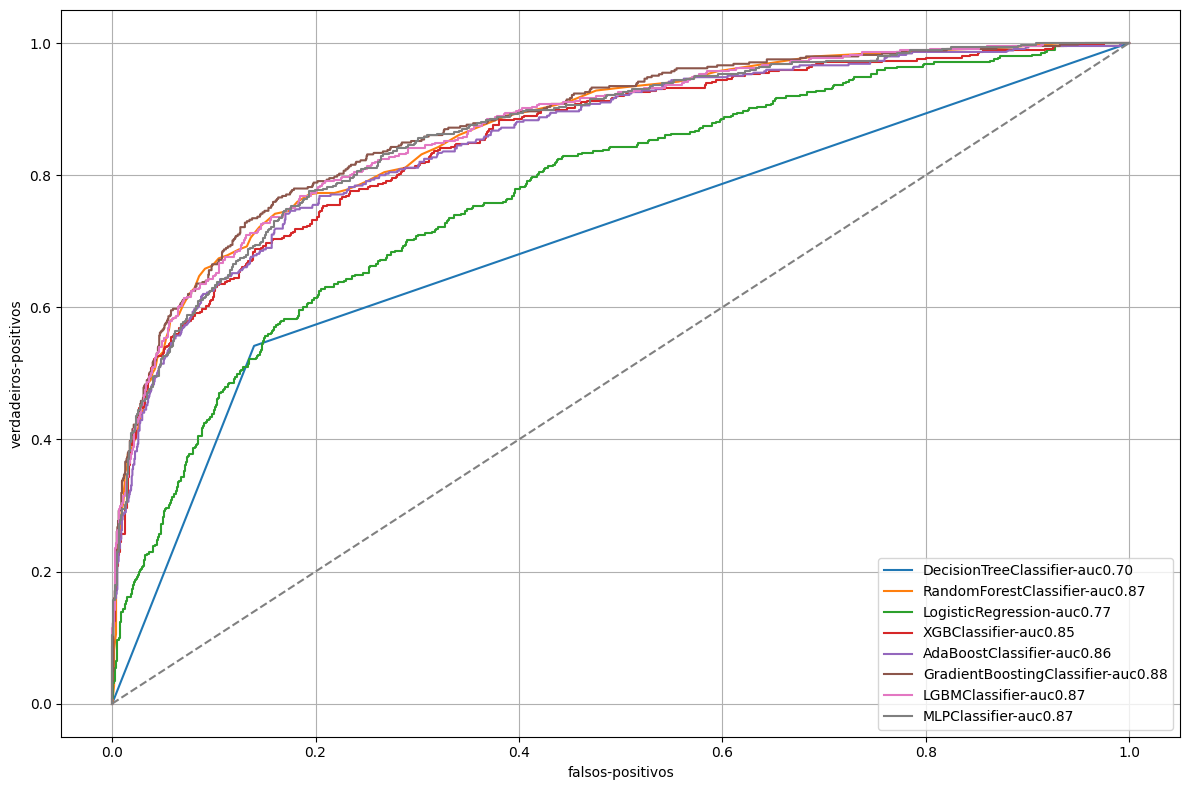

In [50]:
plt.figure(figsize=(12,8))
for i, roc in models.items():
    pipe.set_params(model=roc).fit(x_train, y_train)
    roc_pred = pipe.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, roc_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{roc.__class__.__name__}-auc{roc_auc:.2f}')
    
plt.plot([0,1], [0,1],linestyle='--',color='gray')
plt.legend()
plt.xlabel('falsos-positivos')
plt.ylabel('verdadeiros-positivos')
plt.tight_layout()
plt.grid()
plt.show() 